In [2]:
#Importazioni Librerie
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score, accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
#Importazione Dataset
file_path = r"C:\Users\JoaquimFrancalanci\OneDrive - ITS Angelo Rizzoli\Desktop\MachineLearning\shopping_behavior_updated.csv"
df = pd.read_csv(file_path)

In [4]:
# Visualizzazione delle prime righe del dataset
df.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually


In [5]:
#Prima Visione Dataset
df.describe()

,Customer ID,Age,Purchase Amount (USD),Review Rating,Previous Purchases
count,3900.000000,3900.000000,3900.000000,3900.000000,3900.000000
mean,1950.500000,44.068462,59.764359,3.749949,25.351538
std,1125.977353,15.207589,23.685392,0.716223,14.447125
min,1.000000,18.000000,20.000000,2.500000,1.000000
25%,975.750000,31.000000,39.000000,3.100000,13.000000
50%,1950.500000,44.000000,60.000000,3.700000,25.000000
75%,2925.250000,57.000000,81.000000,4.400000,38.000000
max,3900.000000,70.000000,100.000000,5.000000,50.000000


In [6]:
#Shape del dataset
print(f"Il dataset ha una dimensione {df.shape}\n")

Il dataset ha una dimensione (3900, 18)



In [7]:
#Column  Non-Null Count  Dtype 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer ID             3900 non-null   int64  
 1   Age                     3900 non-null   int64  
 2   Gender                  3900 non-null   object 
 3   Item Purchased          3900 non-null   object 
 4   Category                3900 non-null   object 
 5   Purchase Amount (USD)   3900 non-null   int64  
 6   Location                3900 non-null   object 
 7   Size                    3900 non-null   object 
 8   Color                   3900 non-null   object 
 9   Season                  3900 non-null   object 
 10  Review Rating           3900 non-null   float64
 11  Subscription Status     3900 non-null   object 
 12  Shipping Type           3900 non-null   object 
 13  Discount Applied        3900 non-null   object 
 14  Promo Code Used         3900 non-null   

In [8]:
# Identificazione delle righe duplicate
duplicated_rows = df[df.duplicated(keep=False)]

# Numero di righe duplicate
print(f"Le righe duplicate sono {duplicated_rows.shape[0]}")

Le righe duplicate sono 0


COLONNA AGE

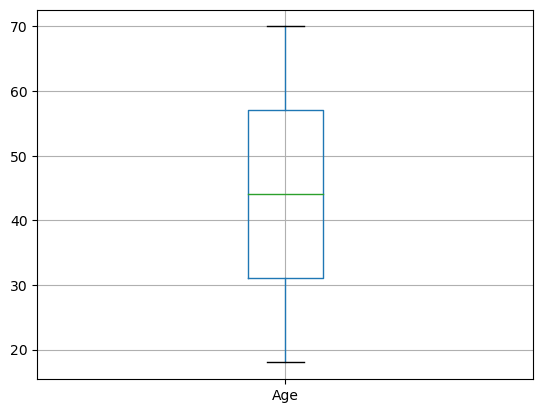

In [37]:
#box plot
demo_data = df[['Age']] 
demo_data.boxplot()
plt.show()


COLONNA PURCHASE AMOUNT ($)

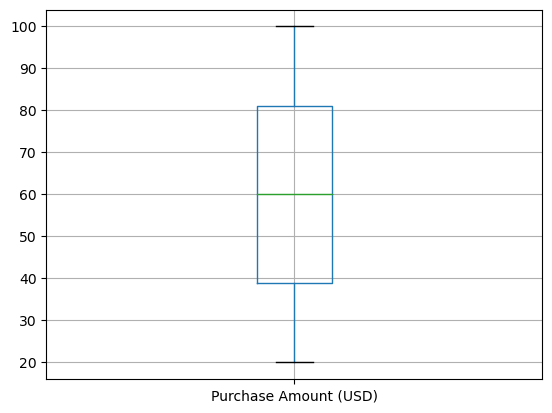

In [39]:
demo_data = df[['Purchase Amount (USD)']] 
demo_data.boxplot()
plt.show()

Purchase Amount Distribution Across Age Groups

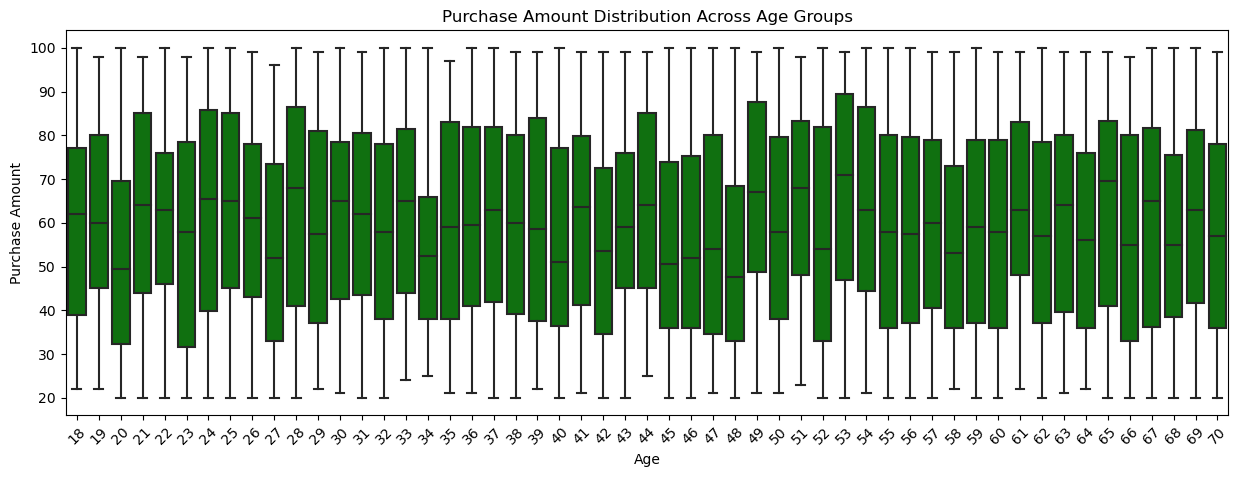

In [67]:
# Box Plots for year
plt.figure(figsize = (15, 5))
sns.boxplot(x = 'Age', y = 'Purchase Amount (USD)', data = df, color="green")
plt.title('Purchase Amount Distribution Across Age Groups')
plt.xlabel('Age')
plt.ylabel('Purchase Amount')
plt.xticks(rotation=45)
plt.show()

Items Purchased by Size

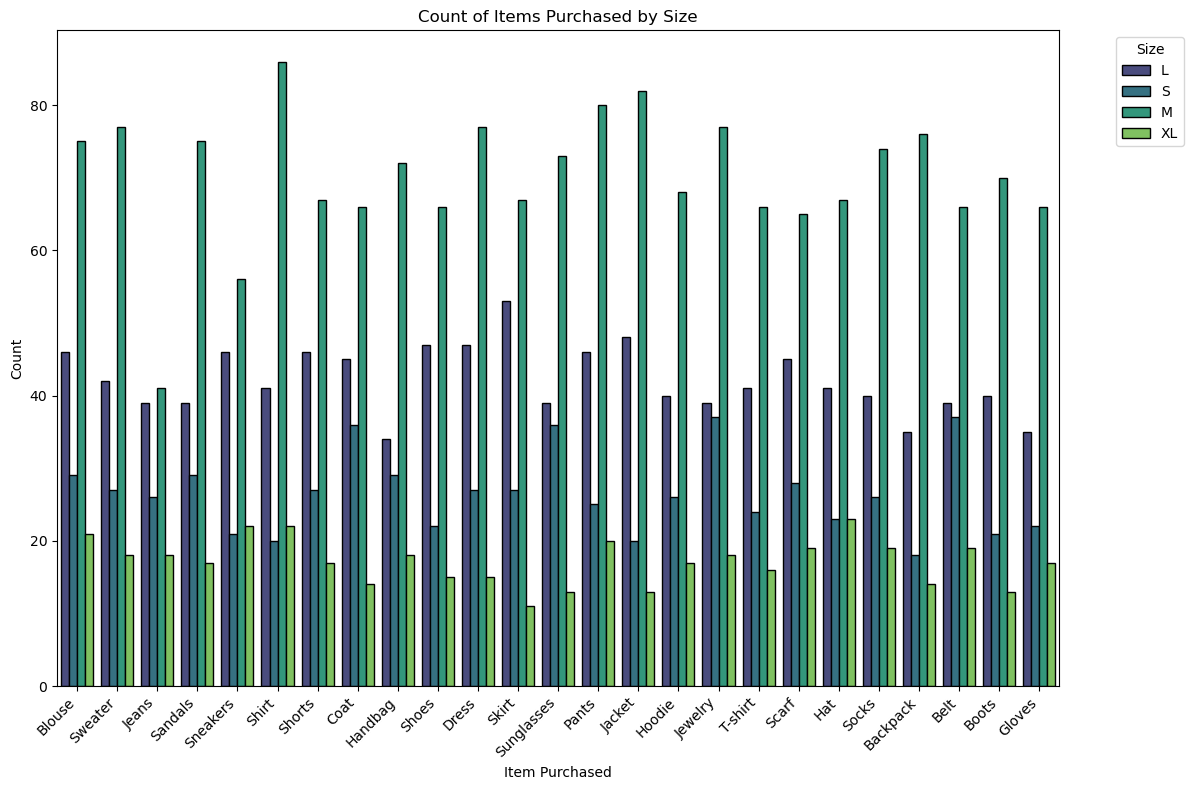

In [70]:
#Count of items Purchased by Size
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,8))
ax = sns.countplot(x='Item Purchased', hue='Size', data=df, palette='viridis',edgecolor='k')
plt.title('Count of Items Purchased by Size')
plt.xlabel('Item Purchased')
plt.ylabel('Count')
plt.legend(title='Size',bbox_to_anchor=(1.05,1), loc='upper left')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
plt.tight_layout()
plt.show()

Customer Segmentation